In [10]:
from matplotlib import pyplot as  plt
import cv2
import numpy as np
from matplotlib.patches import Rectangle

In [11]:
def draw_image_with_boxes(filename, result_list,c):
	# load the image
	data = plt.imread(filename)
	# plot the image
	plt.imshow(data)
	# get the context for drawing boxes
	ax = plt.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result
		# create the shape
		rect = Rectangle((x, y),width,height, fill=False, color=c)
		# draw the box
		ax.add_patch(rect)
	# show the plot
	plt.show()

In [21]:
face_cascade = cv2.CascadeClassifier('cascades/data/haarcascade_frontalface_alt2.xml')

317 144 228 228
245 120 228 228
234 131 228 228
219 137 228 228
222 140 228 228
239 142 228 228
330 197 228 228
330 197 228 228
390 194 228 228
390 194 228 228
399 210 228 228
403 205 228 228
163 19 152 152
182 51 152 152
182 51 152 152
194 72 152 152
220 175 152 152
228 197 152 152
229 211 152 152
229 211 152 152
226 214 152 152
219 210 152 152
219 207 152 152
219 207 152 152
214 203 152 152
213 203 152 152
213 203 152 152
211 202 152 152
211 202 152 152
214 200 152 152
216 199 152 152
218 198 152 152
218 198 152 152
223 199 152 152
234 197 152 152
234 197 152 152
241 197 152 152
245 194 152 152
362 197 228 228
310 171 228 228
299 155 228 228
287 155 228 228
282 152 228 228
282 152 228 228
299 87 228 228
285 108 228 228
294 110 228 228
308 120 228 228
308 120 228 228
319 120 228 228
324 125 228 228
324 120 228 228
324 131 228 228
324 131 228 228
322 137 228 228
324 154 228 228
321 155 228 228
314 165 228 228
314 165 228 228
354 205 152 152
354 205 152 152
355 197 152 152
354 199 152 1

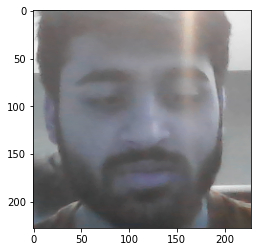

In [22]:
vid = cv2.VideoCapture(0)
while True :
    ret,frame = vid.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor = 1.5)
    for (x,y,w,h) in faces :
        #print(x,y,w,h)
        region_of_interest = frame[y:y+h,x:x+w]
        plt.imshow(region_of_interest)
        
        color = (0,0,255) #BGR
        stroke = 2
        width,height = x + w,y + h
        cv2.rectangle(frame,(x,y),(width,height),color,stroke)
        
        
    cv2.imshow('frame',frame)
    if cv2.waitKey(1)& 0xFF == ord('q') :
        break
        
vid.release()
cv2.destroyAllWindows()

In [14]:
from keras.models import load_model

In [15]:
model = load_model('model-017.model')
face_cascade = cv2.CascadeClassifier('cascades/data/haarcascade_frontalface_alt2.xml')

In [23]:
filename = 'mask2.jpg'
Mask_face = plt.imread(filename)
gray = cv2.cvtColor(Mask_face,cv2.COLOR_BGR2GRAY)

In [24]:
faces = face_cascade.detectMultiScale(gray,scaleFactor = 1.5)

1/1 [==============================] - 0s 28ms/step


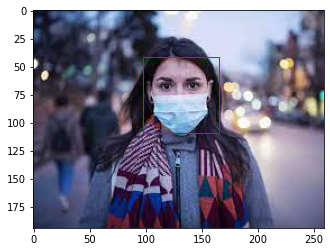

Mask


In [25]:
for x,y,w,h in faces :
    face_img = gray[y:y+w,x:x+h]
    resized = cv2.resize(face_img,(100,100))
    normalized = resized/255
    reshaped = np.reshape(normalized,(1,100,100,1))
    result = model.predict(reshaped)
    label = np.argmax(result,axis = 1)[0]
    if label == 0 :
        draw_image_with_boxes(filename,faces,'green')
        print("Mask")
    else :
        draw_image_with_boxes(filename,faces,'red')
        print("No Mask")

1/1 [==============================] - 0s 30ms/step


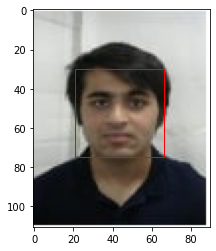

No Mask


In [19]:
filename = 'nomask.jpg'
Mask_face = plt.imread(filename)
gray = cv2.cvtColor(Mask_face,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,scaleFactor = 1.5)        
for x,y,w,h in faces :
    face_img = gray[y:y+w,x:x+h]
    resized = cv2.resize(face_img,(100,100))
    normalized = resized/255
    reshaped = np.reshape(normalized,(1,100,100,1))
    result = model.predict(reshaped)
    label = np.argmax(result,axis = 1)[0]
    if label == 0 :
        draw_image_with_boxes(filename,faces,'green')
        print("Mask")
    else :
        draw_image_with_boxes(filename,faces,'red')    
        print("No Mask")